# FNN(Feedforwarding Neural Network)

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')
tf.set_random_seed(777)

x_data = [[1,2,1],[1,3,2],[1,3,4],
         [1,5,5],[1,7,5],[1,2,5],[1,6,6],
         [1,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],
         [0,1,0],[0,1,0],[0,1,0],[1,0,0],
         [1,0,0]]

x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

# tf.float32 -> 'float'으로 사용 가능
X = tf.placeholder('float',[None, 3])
# y_data가 3개의 요소로되어있는 벡터이기 때문에 [None,3]으로 해주기
Y = tf.placeholder('float',[None,3])

# Y값 shape가 [3,1] 이기 때문에 Wegiht를 모두 계산하려면 Weight Matrix는 3행 3열로 이루어져야 함
W = tf.Variable(tf.random_normal([3,3]))
# bias는 요소가 1개
b = tf.Variable(tf.random_normal([3]))

# softmax로 여러 class로 분류될 확률 summation
# hypothesis의 shape = [3,1]. 여기서 3은 클래스 개수
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# cross-entropy cost function 정의
# multi-class이기 때문에 axis=1(행)로 Y값(label)이 들어있는 값 지칭해주기
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# argmax는 가장큰 요소를 갖는 index반환
# hypothesis의 3개 요소중 가장 큰 값의 index반환. 3개 요소를 열 방향으로 비교하기 때문에 1 넣어주기
prediction = tf.argmax(hypothesis, 1)
# 예측값과 실제값을 비교해 Boolean 값으로 반환
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
# is_correct값들 중 True인 값들만 합해서 데이터 개수로 나누어 평균 정확도 측정
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X:x_data, Y:y_data})
        print(step, cost_val, W_val)
    # 학습후 테스트 데이터로 예측값 반환 - 테스트 데이터로 다시 동작시키므로 feed_dict 해주기
    print("Prediction:\n", sess.run(prediction, feed_dict={X:x_test}))
    print("Accuracy:\n", sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Use

0 5.73203 [[ 0.7288166   0.7153621  -1.1801533 ]
 [-0.5775373  -0.1298833   1.6072978 ]
 [ 0.48373488 -0.51433605 -2.02127   ]]
1 3.317995 [[ 0.6621908   0.74796313 -1.1461285 ]
 [-0.81948906  0.03000022  1.689366  ]
 [ 0.23214608 -0.33772916 -1.9462881 ]]
2 2.0218027 [[ 0.6434202   0.7412768  -1.1206716 ]
 [-0.8116129  -0.00900117  1.7204912 ]
 [ 0.20866647 -0.35079566 -1.909742  ]]
3 1.9710885 [[ 0.6235321   0.7400823  -1.099589  ]
 [-0.80967706 -0.01636279  1.725917  ]
 [ 0.17870611 -0.3366575  -1.8939198 ]]
4 1.9446772 [[ 0.60733104  0.7366498  -1.0799555 ]
 [-0.79007834 -0.03363193  1.7235874 ]
 [ 0.16691463 -0.33406347 -1.8847224 ]]
5 1.9235673 [[ 0.59031737  0.73510236 -1.0613943 ]
 [-0.77496755 -0.04048848  1.7153332 ]
 [ 0.15076597 -0.32209396 -1.8805432 ]]
6 1.9035922 [[ 0.57437915  0.7326285  -1.0429822 ]
 [-0.75527763 -0.05152001  1.7066748 ]
 [ 0.13977788 -0.31497923 -1.8766699 ]]
7 1.88408 [[ 0.5581266   0.73071784 -1.024819  ]
 [-0.7377567  -0.05928203  1.696916  ]
 [ 0.

In [2]:
a = np.array([[1],
             [2],
             [3]])

In [3]:
a + [1]

array([[2],
       [3],
       [4]])

# MNIST data hands_on

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Epoch:1, Cost:3.026574

Epoch:2, Cost:1.125213

Epoch:3, Cost:0.889004

Epoch:4, Cost:0.776008

Epoch:5, Cost:0.705967

Epoch:6, Cost:0.657075

Epoch:7, Cost:0.619899

Epoch:8, Cost:0.590395

Epoch:9, Cost:0.566203

Epoch:10, Cost:0.545325

Epoch:11, Cost:0.527488

Epoch:12, Cost:0.512184

Epoch:13, Cost:0.498391

Epoch:14, Cost:0.486831

Epoch:15, Cost:0.475247

Learning Finished
Accuracy:
 0.8869
Label: [9]
Prediciton:
 [9]


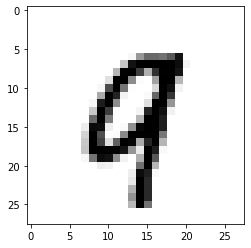

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)

# MNIST 클래스 0~9까지므로 10개
nb_classes = 10
# image 픽셀 한칸을 하나의 Feature로 하기 때문에 가로 28 세로 28
X = tf.placeholder(tf.float32, [None, 28*28])
Y = tf.placeholder(tf.float32, [None, nb_classes])

# Y값이 [10,1]이기 때문에 28*28개의 Feature의 모든 weight 계산하기 위한 Weight Matrix shape
W = tf.Variable(tf.random_normal([28*28, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# multi-class분류라 softmax로 summation
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
# multi class의 cross-entropy
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 모델 테스트하는 텐서 만들기
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))

# epoch, batch size 파라미터 설정
# 100개씩 15번 반복 학습
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # epoch 15번을 한 번씩 수행하도록 반복문 
    for epoch in range(num_epochs):
        avg_cost = 0 
        for i in range(num_iterations):
            # batch size만큼 MNIST 데이터 분할 메소드
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # SGD 수행하면서 cost 계산
            _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys})
            # 평균 cost값 계산(반복문 밖에서 수행해도 괜찮)
            avg_cost += cost_val / num_iterations
        print(f"Epoch:{epoch+1}, Cost:{avg_cost:4f}")
        print()
    print("Learning Finished")
    print('Accuracy:\n',sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    
    # MNIST 이미지 데이터 중 하나 랜덤으로 추출
    r = random.randint(0, mnist.test.num_examples - 1)
    # 위에서 뽑은 랜덤 데이터하나에 매핑된 정답 이미지 추출
    print('Label:', sess.run(tf.argmax(mnist.test.labels[r: r+1], 1)))

    # 위에서 뽑은 랜덤 데이터를 모델에 집어넣어 모델리 예측한 이미지 반환
    print('Prediciton:\n',sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
    
    # 정답 레이블 이미지 출력
    plt.imshow(mnist.test.images[r: r+1].reshape(28, 28),
              cmap='Greys', interpolation='nearest')
    plt.show()

# Deep FNN

In [ ]:
x_data = np.array([[0,0], [0,1], [1,0], [1,1]])

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.cast([0.3, 1.2], dtype=tf.float32)
y = tf.cast(x > 0.5, dtype=tf.float32)
print(sess.run(y))

[0. 1.]


In [15]:
z = tf.equal(1,2)
print(sess.run(z))

False
